két fajta tesztelés van:
MANUÁLIS: ember teszteli
AUTOMATIKUS: program tesztelés. Gyorsabb és kisebb a hiba lehetőség.


*assert* kijelentéssel lehet automatizált hiba kódot készíteni:

így néz ki a szintaxis:  

In [ ]:
assert <condition>, 'Message if condition is not met'

Ez pedig egy példa, hogyan kell alkalmazni:

In [ ]:
def times_ten(number):
    return number * 100
 
result = times_ten(20)
assert result == 200, 'Expected times_ten(20) to return 200, instead got ' + str(result)



és ez egy *AssertionError* nevű hibakódot fog adni nekünk:


In [ ]:

#AssertionError: Expected times_ten(20) to return 200, instead got 2000



	Lehet a kódot automatikusan tesztelni úgy, hogy írsz egy funkciót, amin belül assert-eled a tesztelni kívánt függvényt 
és ahhoz hozzácsatolsz egy kívánt eredményt és leírást. PL:

In [ ]:
def get_nearest_exit(row_number):
  if row_number < 15:
    location = 'front'
  elif row_number < 30:
    location = 'middle'
  else:
    location = 'back'
  return location

Felül van a tesztelni kívánt függvényünk. Alul pedig az, ahogy tudjuk tesztelni a kódunkat hogy minden rendben van-e.

In [ ]:
# Write your code below:
def test_row_1():
  assert get_nearest_exit(1) == "front", 'The nearest exit to row 1 is in the front!'

def test_row_20():
  assert get_nearest_exit(20) == "middle", 'The nearest exit to row 20 is in the middle!'

def test_row_40():
  assert get_nearest_exit(40) == "back", 'The nearest exit to row 40 is in the back!'

test_row_1()
test_row_20()
test_row_40()

**UNITTEST METÓDUS**

Van egy új dolog, egy framework, amit tudunk alkalmazni teszteléshez. Be kell hívni a modult:

In [ ]:
import unittest

Az *unittest* modul ad nekünk egy test runnerrt, amivel osztályokat tudunk akár építeni tesztelés gyanánt. Az új szintaxisok, amik kellenek majd a következők:

In [ ]:
unittest.TestCase # <--- ezt kell majd beírni az osztályba, amikor tesztelni akarunk
self.assertEqual(func(val), result, "doc") #<--- Ez az assert funkció az unittest modulból

Az **assertEqual()** zárójelébe kell beágyazni a funkciót, az eredményt, amit tesztel és utánat a szöveget. 
  
A legvégén pedig előhívni az eredményt a **unittest.main()**-nel lehet.

In [ ]:
unittest.main() #<--- ezzel lehet lehívni az osztályunkat, hogy leteszteljen mindent magától

Tessék egy egész példa a használatára:

In [ ]:
# your code below:
import unittest

def get_nearest_exit(row_number):
  if row_number < 15:
    location = 'front'
  elif row_number < 30:
    location = 'middle'
  else:
    location = 'middle'
  return location

# Write your code below:
class NearestExitTests(unittest.TestCase):
  def test_row_1(self):
    self.assertEqual(get_nearest_exit(1), 'front', 'The nearest exit to row 1 is in the front!')

  def test_row_20(self):
    self.assertEqual(get_nearest_exit(20), 'middle', 'The nearest exit to row 20 is in the middle!')

  def test_row_40(self):
    self.assertEqual(get_nearest_exit(40), 'back', 'The nearest exit to row 40 is in the back!')

unittest.main()

További assert-ek a *unittest*-en belül:

In [ ]:
#csekkolja a két érték egyenlőségét, ha nem az, akkor hibakódot ad.
self.assertEqual(value1, value2)
#az értéket megnézi, hogy benne van-e a container-ben. Ha nem jelenik egyáltalán meg benne, akkor hibakódot ad.
self.assertIn(value, container)
#Ha nem True az érték, akkor hibakódot ad. Boolinokat ezzel lehet jól tesztelni.
self.assertTrue(value)

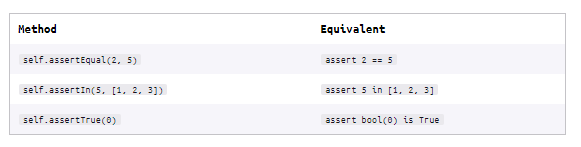

Ez érvényes az összes ilyen összehasonlító a *unittesten* belül:

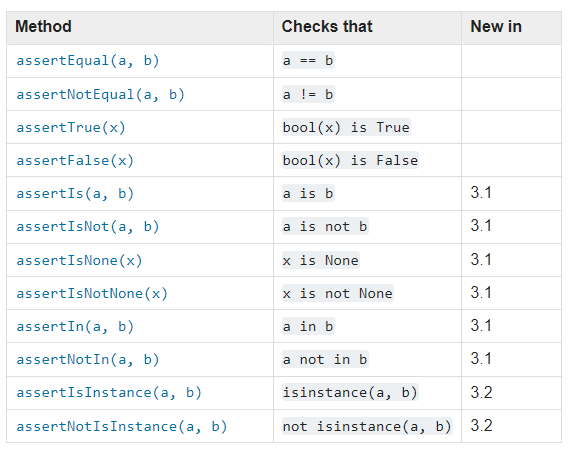

És most pár példa még ezekre. Ez az entertainment.py

In [ ]:
def get_daily_movie():
    print('Retrieving the movie set to play on today\'s flight...')
    return 'Parasite'


def get_licensed_movies():
    print('Retrieving the list of licensed movies from the database...')
    licensed_movies = ['Parasite', 'Nomadland', 'Roma']
    return licensed_movies


def get_wifi_status():
    print('Checking WiFi signal...')
    print('WiFi is inactive')
    return False

Ide importáljuk az entertainemnt.py-t és teszteljük a dolgokat, hogy minden okés-e, használva az előzően említett testelési módszereket

In [ ]:
import unittest
import entertainment

# Write your code below: 
class EntertainmentSystemTests(unittest.TestCase):

  def test_movie_license(self):
    daily_movie = entertainment.get_daily_movie()
    licensed_movies = entertainment.get_licensed_movies()
    self.assertIn(daily_movie, licensed_movies)

  def test_wifi_status(self):
    wifi_enabled = entertainment.get_wifi_status()
    self.assertTrue(wifi_enabled)

unittest.main()


>**N.B.: Az unittest modul elvárja, hogy minden modulunk elején ott legyen a test megnevezés egy testelő osztályon belül!!!**

**KVANTITATÍV ASSERT METÓDUSOK**

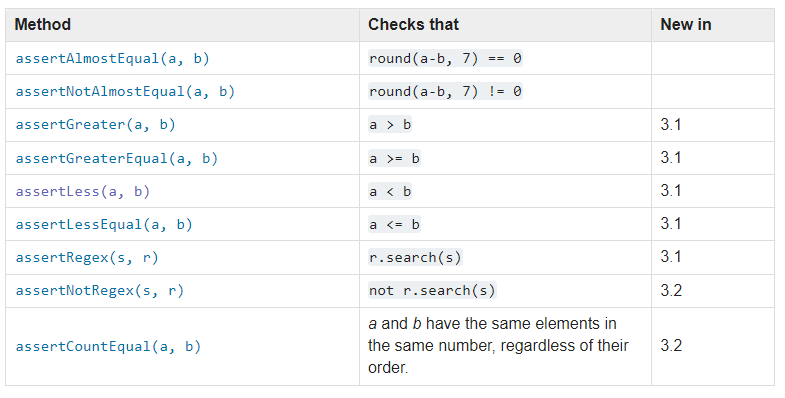

Megjegyezetndő, hogy mindegyik érték után hozzálehet adni egy szöveget is, hogy kiírja azt a hibaüzenetet, ha valami nem úgy van, mint amit szerettünk volna.

**ASSERT METÓDUSOK III: EXCEPTION ÉS WARNING METÓDUSOK**  

Kettő félét vettünk most codecademyn:

Ez lecsekkolja, hogy volt e az a fajta exception hiba. Saját exceptionökkel is lehet futtatni ezeket a függvényeket.  
>.**assertRaises**(exceptionFajta, függvény, függvényArgumentumok)
  
Figyelmezetet, ha a függvényArgumentumok nem felelnek meg egy értéknek.  
>.**assertWarns**(specifikusWarningException, függvény, függvényArgumentumok)

Itt egy példa, hogy kell őket felírni:


In [ ]:
class SystemAlertTests(unittest.TestCase):
  def test_power_outage_alert(self):
    self.assertRaises(alerts.PowerError, alerts.power_outage_detected, True)

  def test_water_levels_warning(self):
    self.assertWarns(alerts.WaterLevelWarning, alerts.water_levels_check, -150)
    
unittest.main()

**PARAMÉTERIZÁLT TESZTELÉS (LOOPOKKAL) - PARAMETERIZATED TESTING**
  
  Ezzel a kóddal könnyebben lehet egyszerre több dolgot tesztelni egy loopon belül megszakítás nélkül, és pontosan tudjuk majd, hogy melyik értékek adták a hibákat:
  
>.*subTest*(érték)

Megjegyezendő, hogy a helyes szintaxis használat megkívánja, a *with*-et a .subTest() előtt, ezzel pedig létrehozunk egy teljesen új block kódot.

for loop
    print statement
    with statement using subTest()
        assertIn() test case

Tessék egy egész példa használtban:

In [ ]:
import unittest
 
# The function we want to test
def times_ten(number):
    return number * 100
 
# Our test class
class TestTimesTen(unittest.TestCase):
 
    # A test method
    def test_times_ten(self):
        for num in [0, 1000000, -10]:
            with self.subTest():
                expected_result = num * 10
                message = 'Expected times_ten(' + str(num) + ') to return ' + str(expected_result)
                self.assertEqual(times_ten(num), expected_result, message)

 N.B.: ha nincs érték beleírva a subTest-en belül akkor a hibadkódot másképpen fogja kiadni.
  ez lesz, ha ()-belül nincs semmi


In [ ]:
FAIL: test_times_ten (__main__.TestTimesTen) (<subtest>)

ez lesz ha van, egy így írva:

In [ ]:
for num in [0, 1000000, -10]:
  with self.subTest(num):

eredmény

In [ ]:
FAIL: test_times_ten (__main__.TestTimesTen) [1000000]

**TEST FIXTURES**

*EZ IS MIND AZ UNITTEST MODULON BELÜL LÉTEZIK*. Itt metódusi megnevezéseket kell tudni. Nem beszélve arról, hogy dekorátorokkal is el lehet látni ezeket a metódusokat, hogy egy oszályon belül funkcionáljanak. Méghozzá osztály metódus dekorálókkal. Class Method decorator (@classmethod). Egy sima metódust írunk egy osztályba, dekorálók kerülnek fölé és cls argumentumot futtatjuk végig rajtuk, ha egy osztályon belül akarjuk kezelni. Ezek léteznek:

In [ ]:
import unittest

def setUp(self) #<--- Minden alkalommal újra futtatja a kódot minden tesztelés előtt.

def tearDown(self)

@classmethod
def tearDownClass(cls):

@classmethod
def setUpClass(cls): #<--- Ilyen verzióban csak az elején fogja futtatni a megadott kódot ez a metódus.

Az unittest modul automatikusan felismeri a tearDown és setUp metódusokat. Tessék egy példa a használatára:

In [ ]:
# Ez a kiosk.py

def power_on_kiosk():
    print('Powering on the check-in kiosk...')


def return_to_welcome_page():
    print('Returning check-in kiosk to Welcome Page')


def power_off_kiosk():
    print('Powering off the check-in kiosk...')

In [ ]:
import unittest
#itt behívtuk a kiosk.py-ot.
import kiosk

class CheckInKioskTests(unittest.TestCase):

  def test_check_in_with_flight_number(self):
    print('Testing the check-in process based on flight number')

  def test_check_in_with_passport(self):
    print('Testing the check-in process based on passport')

  # Write your code below:
  @classmethod
  def setUpClass(cls):
    kiosk.power_on_kiosk()

  @classmethod
  def tearDownClass(cls):
    kiosk.power_off_kiosk()

  def setUp(self):
    kiosk.return_to_welcome_page()
unittest.main()

És ezt adja ki válasznak:

In [ ]:
# Powering on the check-in kiosk...
# Returning check-in kiosk to Welcome Page
# Testing the check-in process based on flight number
# Returning check-in kiosk to Welcome Page
# Testing the check-in process based on passport
# Powering off the check-in kiosk...
# ..
# ----------------------------------------------------------------------
# Ran 2 tests in 0.000s

# OK

**SKIPPING TESTS**

Vannak tesztek, amiket átszeretnénk ugrani mert más OP rendszeren másképp futnának. Mondjuk Windowson fut, Linuxon meg MacOS-en nem. A unittest framework erre is kínál két féle megoldást.

  @unittest <--- dekoráló
  
  skipTest() <--- metódus

van két metódus, amit a dekorálóval együtt kell használni, ami *@unittest*

>**skipUnless(koncíció, string)** <--- átugorja a tesztet, ha FALSE az eredmény

>**skipIf(koncíció, string)** <--- átugorja a tesztet, ha True

Ezután van a **skipTest(string)** metódus, ami csak egy értéket vesz be és az egy string.

  *Egyszerűbb átlátni egyébként a dekorálós módszert.*

  tessék egy példa a használatára:

In [ ]:
#Ez a entertainment.py

def regional_jet():
    print('This is a regional jet...')
    return True

def get_daily_movie():
    print('Retrieving the movie set to play on today\'s flight...')
    return 'Parasite'


def get_licensed_movies():
    print('Retrieving the list of licenses movies from the database...')
    licensed_movies = ['Parasite', 'Nomadland', 'Roma']
    return licensed_movies


def get_wifi_status():
    print('Checking WiFi signal...')
    print('WiFi is active')
    return True

def get_device_temp():
    print('Reading the temperature of the entertainment system device...')
    return 33.2

def get_maximum_display_brightness():
    print('Calculating maximum display brightness in nits...')
    return 399.99999999


In [ ]:
import unittest
#ide van behívva az entertainment
import entertainment

class EntertainmentSystemTests(unittest.TestCase):

  @unittest.skipIf(entertainment.regional_jet(), 'Not available on regional jets')
  def test_movie_license(self):
    daily_movie = entertainment.get_daily_movie()
    licensed_movies = entertainment.get_licensed_movies()
    self.assertIn(daily_movie, licensed_movies)

  @unittest.skipUnless(not entertainment.regional_jet(), 'Not available on regional jets')
  def test_wifi_status(self):
    wifi_enabled = entertainment.get_wifi_status()
    self.assertTrue(wifi_enabled)

  def test_device_temperature(self):
    if entertainment.regional_jet():
      self.skipTest('Not available on regional jets')
    device_temp = entertainment.get_device_temp()
    self.assertLess(device_temp, 35)

  def test_maximum_display_brightness(self):
    if entertainment.regional_jet():
      self.skipTest('Not available on regional jets')
    brightness = entertainment.get_maximum_display_brightness()
    self.assertAlmostEqual(brightness, 400)


unittest.main()


Az eredmény pedig:

In [ ]:

# Output:
# This is a regional jet...
# This is a regional jet...
# This is a regional jet...
# This is a regional jet...
# ssss
# ----------------------------------------------------------------------
# Ran 4 tests in 0.000s

# OK (skipped=4)

**EXPECTED FAILURES**

Vannak, amikor tudjuk, hogy valami hibát fog okozni és azért akarunk errort emelni. Ez a kód akkor sikeres, ha a kódunkban hiba van, és sikertelent fog adni, ha nincs hiba. Ennek a kódnak az a lényege, hogy hibát jelöljünk vele.

>@unittest.expectedFailure

  ezzel a dekorátorral átugorjuk azt a kódblokkot, ami fölé ezt beíjuk. Példa:

In [ ]:
import unittest
import feedback

class CustomerFeedbackTests(unittest.TestCase):

  # Write your code below:
  @unittest.expectedFailure
  def test_survey_form(self):
    self.assertEqual(feedback.issue_survey(), 'Success')

  def test_complaint_form(self):
    self.assertEqual(feedback.log_customer_complaint(), 'Success')

unittest.main()

Itt a def test_survey_form(self) metódust át fogjuk ugrani és a benne lévő kódblokkot.

**REVIEW**
  
  Awesome job! We’ve covered a lot of material related to unit testing in Python. We learned:

>*The difference between manual and automated testing.*

>*What unit tests are.*

>*How to write simple tests with the assert keyword.*

>*How to create and run test cases with the unittest framework.*

>*Best practices for test fixtures, test parameterization, skipped tests and expected failures.*

  The world of software testing is vast and can take time to master, but the basic principles of unit testing will almost always be applicable to any language we work with. Incorporating testing into our software is the best way to prevent unexpected bugs from occurring. The sooner we write tests, the faster we can catch and fix bugs and make our software better!